In [ ]:
pip install wordcloud

In [ ]:
pip install gensim

# **Import**

In [ ]:
import pandas as pd
import wordcloud
from sklearn.feature_extraction.text import TfidfVectorizer

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

In [ ]:
dataset = pd.read_excel('/content/drive/MyDrive/Project 3SD2/03. PREPROCESSING/[PAKAI INI] dataset_preprocessed.xlsx')
dataset.head()

Unnamed: 0.1  Unnamed: 0                       id_review  \
0             0           0  0AT8YB6Ks8fi6nJ3Hy1du9Zx4NV2tv   
1             1           1  0Ci5gW9AR2Ka6fi9RE3Dv8hY4xu0qr   
2             2           2  0Cj1Va1TM8Lf3zl7lK8NG0mY7bC9RD   
3             3           3  0Cn1rS6gb0PI3un6eG0pV7wZ2sY8xT   
4             4           4  0Cp8zR9Iq6LY2is3lD4fA7ef9EW3iX   

                                              review attractions amenities  \
0  Pantai yang cukup terkenal di Manado, pantai L...        none      none   
1  Hari terakhir di Makassar sempatkan maen ke pa...    positive  positive   
2  salah satu pantai di makassar yang terkenal\ns...        none      none   
3  Pantai Losari tempat yang asik untuk jogging p...    positive  positive   
4  Pantai Losari adalah salah satu wisata wajib j...    positive      none   

     access price no_aspect  \
0      none  none      none   
1  positive  none   neutral   
2      none  none      none   
3      none  none   neutral   
4      none  none      none   

                                    attractions_text  \
0                                                NaN   
1  Kt bisa duduk di pinggir pantai Losari sambil ...   
2                                                NaN   
3  Pantai Losari tempat yang asik untuk jogging p...   
4  Pantai Losari adalah salah satu wisata wajib j...   

                                      amenities_text  \
0                                                NaN   
1  Pantai Losari skrg lebih cantik dan tertata ra...   
2                                                NaN   
3  Pantai Losari tempat yang asik untuk jogging p...   
4                                                NaN   

                                         access_text price_text  \
0                                                NaN        NaN   
1  Jalur lalulintas jadi nya searah, mungkin untu...        NaN   
2                                                NaN        NaN   
3                                                NaN        NaN   
4                                                NaN        NaN   

                                      no_aspect_text  \
0                                                NaN   
1  Hari terakhir di Makassar sempatkan maen ke pa...   
2                                                NaN   
3  Datanglah pagi hari saat udara masih sejuk. Da...   
4                                                NaN   

                            cleaned_text_attractions  \
0                                                NaN   
1  kt duduk pinggir pantai losari nikmat pisang e...   
2                                                NaN   
3  pantai losari asik jogging pagi kota makassar ...   
4  pantai losari salah wisata wajib makasar panta...   

                              cleaned_text_amenities  \
0                                                NaN   
1  pantai losari skrg cantik tata rapi pantai los...   
2                                                NaN   
3  pantai losari asik jogging pagi kota makassar ...   
4                                                NaN   

                                 cleaned_text_access cleaned_text_price  \
0                                                NaN                NaN   
1  jalur lalulintas nya arah atas macet tata rapi...                NaN   
2                                                NaN                NaN   
3                                                NaN                NaN   
4                                                NaN                NaN   

                              cleaned_text_no_aspect  \
0                                                NaN   
1  makassar sempat maen pantai losari kalo makass...   
2                                                NaN   
3  datang pagi udara sejuk datang pagi udara seju...   
4                                                NaN   

                                      cleaned_review  
0  pantai kenal manado pantai losari 

# **Aspek Price**

### **Text Negatif**

In [ ]:
# Mengambil selain "none" dan mengambil "negative"
df_price = dataset[(dataset['price'] != 'none') & ((dataset['price'] == 'negative'))]

df_price_negative = df_price[['cleaned_text_price']].values
teks_negatif = df_price['cleaned_text_price']
print(teks_negatif)
# df_price_negative.head()

88      anjung patung patung jual makan ratus gerobak ...
508     kuliner temu relatif mahal kuliner temu relati...
874     minggu biaya parkir pantai losari rb pajak pre...
1011    ramai crowded banget jual jajan pisang epe sar...
1173    kali pantai ikonik makassar harap bawa uang ha...
1403    suasana enak klo beli makan harga suasana enak...
1408    suasana nyaman jajan jajan hati hati ya harga ...
1418    beli makan harap hati hati bijak harga nya pes...
1442    puji hasil foto uang ribu d kasi ngomel bilang...
1479    ekspek pandang event keren bgt pisangepe enak ...
1657    harga camil sy mahal parkir byk gratis harga c...
1683    tempat bersih pklnya tata rapi pas foto parkir...
1854    gw makan temen temen tujuh abis rb cmn pisang ...
1870    klo fotografer moto in nerangin bla pake hp me...
1895    kesini pas acara f acara mantap stand makan pa...
Name: cleaned_text_price, dtype: object


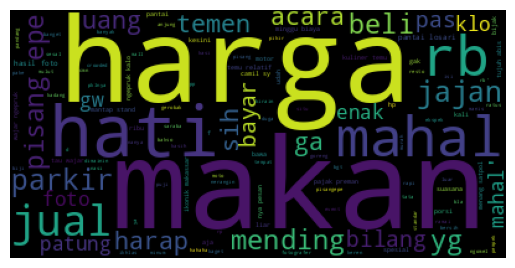

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

wordcloud = WordCloud().generate(str(df_price_negative))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# **LDA Topic Modelling**

In [ ]:
def tokenisasi(text):
    tokens = text.split(" ")
    return tokens
tokens_negatif = [tokenisasi(t) for t in teks_negatif]
print(tokens_negatif)

[['anjung', 'patung', 'patung', 'jual', 'makan', 'ratus', 'gerobak', 'situ', 'jual', 'pisang', 'epe', 'mahal', 'porsi', 'anjung', 'patung', 'patung', 'jual', 'makan', 'ratus', 'gerobak', 'situ', 'jual', 'pisang', 'epe', 'mahal', 'porsi'], ['kuliner', 'temu', 'relatif', 'mahal', 'kuliner', 'temu', 'relatif', 'mahal', 'kuliner', 'temu', 'relatif', 'mahal'], ['minggu', 'biaya', 'parkir', 'pantai', 'losari', 'rb', 'pajak', 'preman', 'yg', 'menang', 'satpol', 'pp', 'minggu', 'biaya', 'parkir', 'pantai', 'losari', 'rb', 'pajak', 'preman', 'yg', 'menang', 'satpol', 'pp', 'minggu', 'biaya', 'parkir', 'pantai', 'losari', 'rb', 'pajak', 'preman', 'yg', 'menang', 'satpol', 'pp'], ['ramai', 'crowded', 'banget', 'jual', 'jajan', 'pisang', 'epe', 'saraba', 'bakso', 'pempek', 'nasi', 'goreng', 'sih', 'aja', 'ga', 'spesial', 'harga', 'ga', 'tau', 'wajar', 'ngepruk', 'kalo', 'sih', 'mahal', 'ramai', 'crowded', 'banget', 'jual', 'jajan', 'pisang', 'epe', 'saraba', 'bakso', 'pempek', 'nasi', 'goreng', 's

In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(tokens_negatif)
# Create Corpus
# Term Frequency
corpus = [id2word.doc2bow(text) for text in tokens_negatif]
# View
print(id2word)
print(corpus[:1])

Dictionary<149 unique tokens: ['anjung', 'epe', 'gerobak', 'jual', 'mahal']...>
[[(0, 2), (1, 2), (2, 2), (3, 4), (4, 2), (5, 2), (6, 4), (7, 2), (8, 2), (9, 2), (10, 2)]]


In [ ]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('anjung', 2),
  ('epe', 2),
  ('gerobak', 2),
  ('jual', 4),
  ('mahal', 2),
  ('makan', 2),
  ('patung', 4),
  ('pisang', 2),
  ('porsi', 2),
  ('ratus', 2),
  ('situ', 2)]]

In [ ]:
# Build LDA model
import gensim
lda_model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=5,random_state=100,chunksize=100,passes=10,per_word_topics=True)

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=num_topics,random_state=100,chunksize=100,passes=10,per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


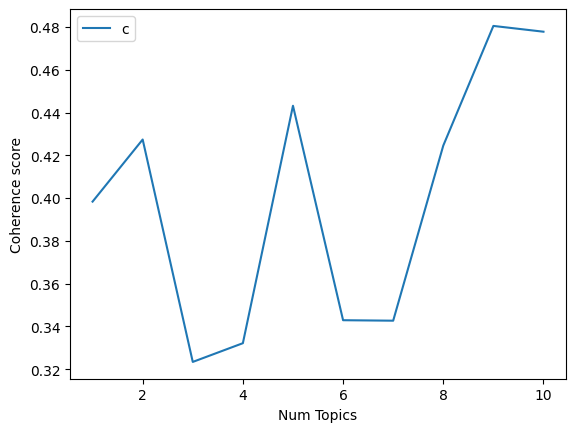

coherence_values:  [0.39836147235068925, 0.4273793882025009, 0.32344663221132947, 0.33220186530802565, 0.4431534624258907, 0.34293715292207055, 0.34271563148584555, 0.4245418722004005, 0.48046440743325836, 0.4777595583636143]


In [ ]:
start=1
limit=11
step=1
model_list, coherence_values = compute_coherence_values(id2word, corpus, tokens_negatif, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
print("coherence_values: ", coherence_values)

In [ ]:
lda_model.print_topics() #num_word default is 10
#lda_model.show_topics() #ini juga bisa

[(0,
  '0.069*"sih" + 0.069*"ga" + 0.036*"harga" + 0.036*"mahal" + 0.036*"ngepruk" + 0.036*"tau" + 0.036*"kalo" + 0.036*"wajar" + 0.036*"spesial" + 0.036*"aja"'),
 (1,
  '0.051*"makan" + 0.041*"parkir" + 0.036*"hati" + 0.036*"mahal" + 0.031*"rb" + 0.031*"acara" + 0.026*"pas" + 0.021*"jual" + 0.021*"patung" + 0.016*"beli"'),
 (2,
  '0.064*"jajan" + 0.047*"harga" + 0.038*"hati" + 0.038*"mending" + 0.029*"harap" + 0.029*"pantai" + 0.029*"gak" + 0.029*"bawa" + 0.029*"murah" + 0.029*"bilang"'),
 (3,
  '0.085*"mahal" + 0.053*"harga" + 0.053*"sy" + 0.053*"camil" + 0.036*"enak" + 0.036*"pisangepe" + 0.036*"pandang" + 0.036*"event" + 0.036*"keren" + 0.036*"bgt"'),
 (4,
  '0.040*"makan" + 0.040*"rb" + 0.035*"foto" + 0.035*"temen" + 0.029*"yg" + 0.023*"hasil" + 0.023*"gw" + 0.023*"klo" + 0.023*"udah" + 0.023*"mending"')]

In [ ]:
print("Topic distribution for document :", " ".join(tokens_negatif[0]))
print("feature of each token:", [(id2word[id], freq) for id, freq in corpus[0]])
lda_model.get_document_topics(corpus[0])

Topic distribution for document : anjung patung patung jual makan ratus gerobak situ jual pisang epe mahal porsi anjung patung patung jual makan ratus gerobak situ jual pisang epe mahal porsi
feature of each token: [('anjung', 2), ('epe', 2), ('gerobak', 2), ('jual', 4), ('mahal', 2), ('makan', 2), ('patung', 4), ('pisang', 2), ('porsi', 2), ('ratus', 2), ('situ', 2)]


[(1, 0.97004503)]

In [ ]:
import pandas as pd
def format_topics_sentences(ldamodel, corpus, texts):
      # Init output
      sent_topics_df = pd.DataFrame()

      # Get main topic in each document
      for i, row in enumerate(ldamodel[corpus]):
          row = sorted(row[0], key=lambda x: (x[1]), reverse=True)   # tambahkan indeks [0] pada variabel row

          # Get the Dominant topic, Perc Contribution and Keywords for each document
          for j, (topic_num, prop_topic) in enumerate(row):
              if j == 0: # => dominant topic
                   wp = ldamodel.show_topic(topic_num, 5) #get most  significant topic
                   topic_keywords = ", ".join([word for word, prop in wp])
                   sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
              else:
                   break
      sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

      # Add original text to the end of the output
      contents = pd.Series(texts)
      sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
      return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=tokens_negatif)
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Topic Keywords', 'Text']

#Save to csv
df_dominant_topic.to_csv('/content/drive/MyDrive/Project 3SD2/09. PEMODELAN TOPIK DAN INTERPRETASI/doc_topic_dominant_price_negative.csv')
# Show
df_dominant_topic.head(5)

<ipython-input-16-580c0e2cd776>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-16-580c0e2cd776>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-16-580c0e2cd776>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-16-580c0e2cd776>:15: FutureWarning: The frame.append method is deprecated and will be removed from p

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0               1              0.9700   
1            1               1              0.9381   
2            2               1              0.9783   
3            3               0              0.9868   
4            4               2              0.9783   

                       Topic Keywords  \
0      makan, parkir, hati, mahal, rb   
1      makan, parkir, hati, mahal, rb   
2      makan, parkir, hati, mahal, rb   
3      sih, ga, harga, mahal, ngepruk   
4  jajan, harga, hati, mending, harap   

                                                Text  
0  [anjung, patung, patung, jual, makan, ratus, g...  
1  [kuliner, temu, relatif, mahal, kuliner, temu,...  
2  [minggu, biaya, parkir, pantai, losari, rb, pa...  
3  [ramai, crowded, banget, jual, jajan, pisang, ...  
4  [kali, pantai, ikonik, makassar, harap, bawa, ...

In [ ]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model,
texts=tokens_negatif, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4413721780457432


In [ ]:
coherence_per_topic = coherence_model_lda.get_coherence_per_topic()
print('\nCoherence Per Topic Score: ', coherence_per_topic)


Coherence Per Topic Score:  [0.9601520941642565, 0.4787722934151318, 0.2210377314276141, 0.29481171387902594, 0.25208705734268744]


In [ ]:
pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 31.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicor

In [ ]:
pip install pandas==1.5.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 22.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [ ]:
import pyLDAvis.gensim_models
import pickle
import pyLDAvis
# Visualize the topics

pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.062241 -0.188787       1        1  34.098155
4      0.143992  0.111941       2        1  30.023353
2      0.021112  0.062510       3        1  16.825457
0     -0.179040  0.038210       4        1  12.558302
3     -0.048305 -0.023874       5        1   6.494733, topic_info=       Term       Freq      Total Category  logprob  loglift
4     mahal  11.000000  11.000000  Default  30.0000  30.0000
40      sih   4.000000   4.000000  Default  29.0000  29.0000
30       ga   4.000000   4.000000  Default  28.0000  28.0000
33    jajan   7.000000   7.000000  Default  27.0000  27.0000
32    harga  13.000000  13.000000  Default  26.0000  26.0000
..      ...        ...        ...      ...      ...      ...
14    biaya   0.106169   3.234718   Topic5  -5.7091  -0.6825
17   minggu   0.106086   3.234766   Topic5  -5.7098  -0.6833
24   satpol   0.106014   3.234810   Topic5  -5.7105  -0.6840
23       rb   0.106414  11.538566   Topic5  -5.7067  -1.9519
63  mending   0.106131   7.005322   Topic5  -5.7094  -1.4556

[231 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
110       2  0.935239    abis
142       1  0.870364   acara
26        4  0.715204     aja
73        2  0.644194   ambil
0         1  0.833888  anjung
...     ...       ...     ...
126       2  0.743459    udah
43        4  0.715219   wajar
68        3  0.905089      ya
25        1  0.406871      yg
25        2  0.542495      yg

[176 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 3, 1, 4])